### Objective:

#### Perform a sentiment analysis of the Twitter activity on the following news organizations: BBC, CBS, CNN, Fox and The New York Times. Using a scatter plot and bar plot  to analysis the compound sentiment of a tweet and overall sentiments of the last 100 tweets per organizations.

In [1]:
# Dependencies and Setup
import tweepy
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Loading news organizations
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Counter
#counter = 0 - Used to test loop

# Variable for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets) per news outlet.
for user in target_user:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count=100)
    tweetscount = 1

    # Loop through all tweets 
    for tweet in public_tweets:
        
        #print("Tweet %s: %s" % (counter, tweet["text"])) - Testing loop for counter.
             
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_text = tweet["text"]
        tweets_ago = tweetscount
        
        
        # Add sentiments for each tweet into a list
        sentiments.append({"User" : user,
                            "Date": tweet["created_at"], 
                            "Compound": compound,
                            "Positive": pos,
                            "Negative": neu,
                            "Neutral": neg,
                            "Tweets Ago": tweetscount,
                            "Tweet Text" : tweet_text})
        
        # Add to counter 
        tweetscount += 1
        #counter += 1 -used to test loop 

In [3]:
# Convert sentiments to DataFrame
NewsMedia_pd = pd.DataFrame.from_dict(sentiments)
NewsMedia_pd

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sat Aug 04 00:08:00 +0000 2018,1.000,0.000,0.000,My Indian Life: Kalki tells stories of young I...,1,@BBCWorld
1,-0.2263,Sat Aug 04 00:05:42 +0000 2018,0.826,0.174,0.000,"Who's had a week to forget, or a week to remem...",2,@BBCWorld
2,-0.2960,Sat Aug 04 00:03:25 +0000 2018,0.629,0.227,0.143,"Zimbabwe enters a new era, but struggles to es...",3,@BBCWorld
3,0.0000,Fri Aug 03 23:42:57 +0000 2018,1.000,0.000,0.000,Trump ex-campaign chief Manafort's 'income doc...,4,@BBCWorld
4,-0.6597,Fri Aug 03 22:45:31 +0000 2018,0.597,0.403,0.000,Denmark veil ban: First woman charged for wear...,5,@BBCWorld
5,0.3612,Fri Aug 03 22:32:44 +0000 2018,0.706,0.000,0.294,Ryanair pilots agree to third-party mediation ...,6,@BBCWorld
6,0.0000,Fri Aug 03 21:58:14 +0000 2018,1.000,0.000,0.000,Five wrestlers who proved there's life beyond ...,7,@BBCWorld
7,-0.2732,Fri Aug 03 21:44:26 +0000 2018,0.884,0.116,0.000,"A massive dust storm rolls through Phoenix, Ar...",8,@BBCWorld
8,0.0000,Fri Aug 03 21:12:52 +0000 2018,1.000,0.000,0.000,Andrea Bocelli to perform for Pope at Dublin e...,9,@BBCWorld
9,0.0000,Fri Aug 03 21:05:15 +0000 2018,1.000,0.000,0.000,Zimbabwe election: President Mnangagwa calls f...,10,@BBCWorld


In [4]:
# Reorganizing columns of data
organized_NewsMedia = NewsMedia_pd[["User","Tweets Ago","Date","Compound","Positive","Neutral","Negative","Tweet Text"]]
organized_NewsMedia


,User,Tweets Ago,Date,Compound,Positive,Neutral,Negative,Tweet Text
0,@BBCWorld,1,Sat Aug 04 00:08:00 +0000 2018,0.0000,0.000,0.000,1.000,My Indian Life: Kalki tells stories of young I...
1,@BBCWorld,2,Sat Aug 04 00:05:42 +0000 2018,-0.2263,0.000,0.174,0.826,"Who's had a week to forget, or a week to remem..."
2,@BBCWorld,3,Sat Aug 04 00:03:25 +0000 2018,-0.2960,0.143,0.227,0.629,"Zimbabwe enters a new era, but struggles to es..."
3,@BBCWorld,4,Fri Aug 03 23:42:57 +0000 2018,0.0000,0.000,0.000,1.000,Trump ex-campaign chief Manafort's 'income doc...
4,@BBCWorld,5,Fri Aug 03 22:45:31 +0000 2018,-0.6597,0.000,0.403,0.597,Denmark veil ban: First woman charged for wear...
5,@BBCWorld,6,Fri Aug 03 22:32:44 +0000 2018,0.3612,0.294,0.000,0.706,Ryanair pilots agree to third-party mediation ...
6,@BBCWorld,7,Fri Aug 03 21:58:14 +0000 2018,0.0000,0.000,0.000,1.000,Five wrestlers who proved there's life beyond ...
7,@BBCWorld,8,Fri Aug 03 21:44:26 +0000 2018,-0.2732,0.000,0.116,0.884,"A massive dust storm rolls through Phoenix, Ar..."
8,@BBCWorld,9,Fri Aug 03 21:12:52 +0000 2018,0.0000,0.000,0.000,1.000,Andrea Bocelli to perform for Pope at Dublin e...
9,@BBCWorld,10,Fri Aug 03 21:05:15 +0000 2018,0.0000,0.000,0.000,1.000,Zimbabwe election: President Mnangagwa calls f...


In [5]:
# Renaming columns
NewsMedia_renamed = organized_NewsMedia.rename(columns={"User":"News Source", "Tweet Text":"Tweet"})
NewsMedia_renamed

,News Source,Tweets Ago,Date,Compound,Positive,Neutral,Negative,Tweet
0,@BBCWorld,1,Sat Aug 04 00:08:00 +0000 2018,0.0000,0.000,0.000,1.000,My Indian Life: Kalki tells stories of young I...
1,@BBCWorld,2,Sat Aug 04 00:05:42 +0000 2018,-0.2263,0.000,0.174,0.826,"Who's had a week to forget, or a week to remem..."
2,@BBCWorld,3,Sat Aug 04 00:03:25 +0000 2018,-0.2960,0.143,0.227,0.629,"Zimbabwe enters a new era, but struggles to es..."
3,@BBCWorld,4,Fri Aug 03 23:42:57 +0000 2018,0.0000,0.000,0.000,1.000,Trump ex-campaign chief Manafort's 'income doc...
4,@BBCWorld,5,Fri Aug 03 22:45:31 +0000 2018,-0.6597,0.000,0.403,0.597,Denmark veil ban: First woman charged for wear...
5,@BBCWorld,6,Fri Aug 03 22:32:44 +0000 2018,0.3612,0.294,0.000,0.706,Ryanair pilots agree to third-party mediation ...
6,@BBCWorld,7,Fri Aug 03 21:58:14 +0000 2018,0.0000,0.000,0.000,1.000,Five wrestlers who proved there's life beyond ...
7,@BBCWorld,8,Fri Aug 03 21:44:26 +0000 2018,-0.2732,0.000,0.116,0.884,"A massive dust storm rolls through Phoenix, Ar..."
8,@BBCWorld,9,Fri Aug 03 21:12:52 +0000 2018,0.0000,0.000,0.000,1.000,Andrea Bocelli to perform for Pope at Dublin e...
9,@BBCWorld,10,Fri Aug 03 21:05:15 +0000 2018,0.0000,0.000,0.000,1.000,Zimbabwe election: President Mnangagwa calls f...


In [6]:
#Saving DataFrame as csv 
NewsMedia_renamed.to_csv("output/News_Mood.csv")

### Scatter Plot: Sentiment Analysis of Media Tweets

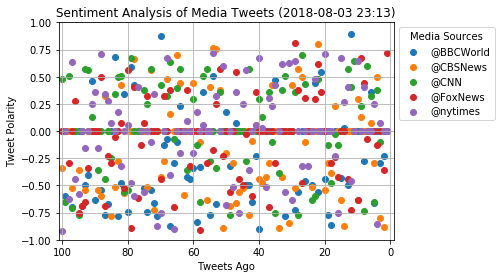

In [7]:
#Scatter Plot: Sentiment Analysis of Media Tweets
#Set x limit
plt.xlim(101, -1)
plt.ylim(-1, 1)

#Plot scatter plot using for loop
for user in target_user:
    NewsScatter_df = NewsMedia_renamed.loc[NewsMedia_renamed["News Source"] == user]
    plt.scatter(NewsScatter_df["Tweets Ago"],NewsScatter_df["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')

#Pull current date/time
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
#Add title, x axis label, and y axis label.
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set grid on plot
plt.grid()
#Save plot to charts folder
plt.savefig("charts/Media Sentiment Analysis.png")
plt.show()

In [8]:
# Compound average per news source
AvgCompound_df = NewsMedia_renamed.groupby("News Source")["Compound"].mean()
AvgCompound_df

News Source
@BBCWorld   -0.202010
@CBSNews    -0.121820
@CNN         0.036222
@FoxNews    -0.065342
@nytimes    -0.002916
Name: Compound, dtype: float64

In [9]:
# Reset index
CompoundMediaAvg = AvgCompound_df.reset_index()
CompoundMediaAvg

,News Source,Compound
0,@BBCWorld,-0.202010
1,@CBSNews,-0.121820
2,@CNN,0.036222
3,@FoxNews,-0.065342
4,@nytimes,-0.002916


### Bar Chart: Overall Media Sentiment based on Twitter

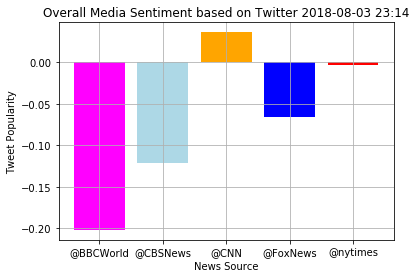

In [10]:
#Bar Chart: Overall Media Sentiment based on Twitter
#Plot bar
plt.bar(CompoundMediaAvg["News Source"], CompoundMediaAvg["Compound"], color = ["magenta", "lightblue", "orange", "blue", "red"])

#Pull current date/time
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

#Created title, x/y axis labels, show grid and save graph to "charts" folder
plt.title(f"Overall Media Sentiment based on Twitter {now}")
plt.xlabel("News Source")
plt.ylabel("Tweet Popularity")
plt.grid()
plt.savefig("charts/Overall Media Bar Plot.png")
plt.show()

### Observable Trends

   #### 1. Per the "Overall Media Sentiment based on Twitter" bar plot on 8/3/2018 at 11:14pm...CNN news was the only news source with a positive sentiment at 0.036222 of it's last 100 tweets.

#### 2. Per the "Overall Media Sentiment based on Twitter" bar plot on 8/3/2018 at 11:14pm...the BBC World News news source has the most negative sentiment at -0.202010 of it's last 100 tweets.

#### 3. Per the "Overall Media Sentiment based on Twitter" bar plot on 8/3/2018 at 11:14pm...even though The New York Times news source setiment was negative -0.002916, it's also the closest to being neutral according to the last 100 tweets. 